# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

In [3]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

In [ ]:
- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [5]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [7]:
fraud.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [9]:
#Distribution Analysis
target_var = fraud['fraud'].value_counts()
target_var

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

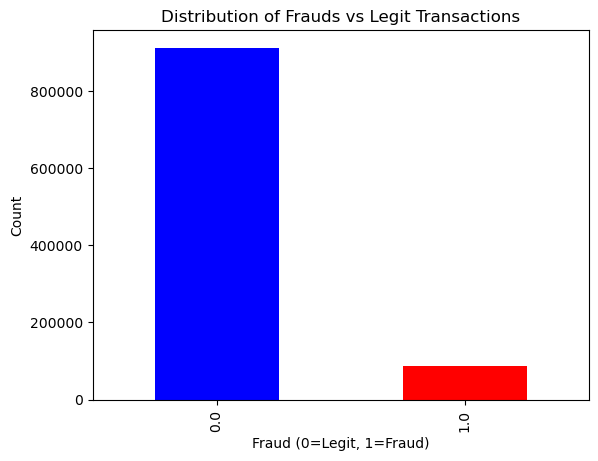

In [11]:
# visualization of distributions
target_var.plot(kind='bar', color=['blue', 'r'], title='Distribution of Frauds vs Legit Transactions')
plt.xlabel('Fraud (0=Legit, 1=Fraud)')
plt.ylabel('Count')
plt.show()

In [15]:
#This is an imbalanced dataset!

In [13]:
print(fraud.columns.tolist())

['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']


In [15]:
features = fraud.drop(columns = ['fraud'], axis=1) #X
target = fraud["fraud"] #y
fraud

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [23]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [25]:
log_reg.score(X_test_scaled, y_test)

0.958612

In [27]:
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score

pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228207
         1.0       0.89      0.60      0.72     21793

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.95    250000



In [ ]:
- **4.** Run **Oversample** in order to balance our target variable 
and repeat the steps above, now with balanced data. Does it improve the performance of our model?

In [29]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [31]:
train['fraud'] = y_train.values

In [34]:
yes_fraud = train[train['fraud'] == 1]
no_fraud = train[train['fraud'] == 0]

In [37]:
from sklearn.utils import resample

yes_diabetes_oversampled = resample(yes_fraud, 
                                    replace=True, 
                                    n_samples = len(no_fraud),
                                    random_state=0)

In [40]:
train_over = pd.concat([yes_diabetes_oversampled, no_fraud])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
497615,-0.004884,-0.187064,1.722116,0.367047,-0.734952,-0.334919,0.731938,1.0
486138,-0.355260,-0.189945,3.573221,0.367047,1.360632,-0.334919,0.731938,1.0
524730,2.110279,-0.039276,-0.527677,0.367047,-0.734952,-0.334919,0.731938,1.0
241229,-0.340463,-0.185791,1.593725,0.367047,1.360632,-0.334919,0.731938,1.0
479083,0.010700,-0.174176,0.841573,0.367047,-0.734952,-0.334919,0.731938,1.0
...,...,...,...,...,...,...,...,...
749995,-0.356036,0.136112,-0.530226,0.367047,-0.734952,-0.334919,0.731938,0.0
749996,0.266820,-0.126192,-0.547125,0.367047,-0.734952,-0.334919,0.731938,0.0
749997,-0.361939,-0.000055,-0.480570,0.367047,-0.734952,-0.334919,0.731938,0.0
749998,0.643896,-0.175593,0.096714,0.367047,1.360632,-0.334919,-1.366236,0.0


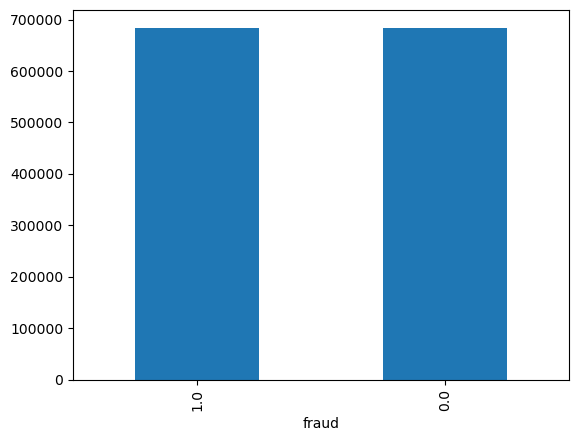

In [45]:
yes_fraud_plt = train_over["fraud"].value_counts()
yes_fraud_plt.plot(kind="bar")
plt.show()

In [48]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [50]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [52]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228207
         1.0       0.58      0.95      0.72     21793

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [ ]:
#Undersampling

In [54]:
train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,-0.381961,-0.164899,0.295400,-2.724447,1.360632,-0.334919,0.731938,0.0
1,-0.251722,-0.188088,-0.149535,0.367047,1.360632,-0.334919,-1.366236,0.0
2,0.018355,-0.186868,0.320462,0.367047,1.360632,-0.334919,0.731938,0.0
3,0.072810,-0.156369,0.075814,0.367047,-0.734952,-0.334919,0.731938,0.0
4,-0.360469,0.006104,0.849124,0.367047,1.360632,-0.334919,-1.366236,0.0
...,...,...,...,...,...,...,...,...
749995,-0.356036,0.136112,-0.530226,0.367047,-0.734952,-0.334919,0.731938,0.0
749996,0.266820,-0.126192,-0.547125,0.367047,-0.734952,-0.334919,0.731938,0.0
749997,-0.361939,-0.000055,-0.480570,0.367047,-0.734952,-0.334919,0.731938,0.0
749998,0.643896,-0.175593,0.096714,0.367047,1.360632,-0.334919,-1.366236,0.0


In [57]:
no_diabetes_undersampled = resample(no_fraud, 
                                    replace=False, 
                                    n_samples = len(yes_fraud),
                                    random_state=0)
no_diabetes_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
643056,-0.071193,-0.177824,0.534796,0.367047,-0.734952,-0.334919,-1.366236,0.0
373149,-0.348224,-0.154949,-0.515471,0.367047,-0.734952,-0.334919,0.731938,0.0
364136,-0.190567,-0.183483,-0.214490,0.367047,1.360632,-0.334919,0.731938,0.0
536559,1.040830,0.904327,-0.311052,0.367047,-0.734952,-0.334919,-1.366236,0.0
23205,-0.171518,1.584105,-0.173265,0.367047,-0.734952,-0.334919,-1.366236,0.0
...,...,...,...,...,...,...,...,...
413601,-0.335461,-0.154715,-0.302587,0.367047,1.360632,-0.334919,0.731938,0.0
410930,-0.236292,-0.135753,-0.587662,0.367047,1.360632,-0.334919,-1.366236,0.0
151692,-0.387280,-0.112421,-0.389812,-2.724447,1.360632,-0.334919,0.731938,0.0
173250,-0.255147,-0.100551,-0.486041,0.367047,-0.734952,-0.334919,0.731938,0.0


In [59]:
train_under = pd.concat([no_diabetes_undersampled, yes_fraud])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
643056,-0.071193,-0.177824,0.534796,0.367047,-0.734952,-0.334919,-1.366236,0.0
373149,-0.348224,-0.154949,-0.515471,0.367047,-0.734952,-0.334919,0.731938,0.0
364136,-0.190567,-0.183483,-0.214490,0.367047,1.360632,-0.334919,0.731938,0.0
536559,1.040830,0.904327,-0.311052,0.367047,-0.734952,-0.334919,-1.366236,0.0
23205,-0.171518,1.584105,-0.173265,0.367047,-0.734952,-0.334919,-1.366236,0.0
...,...,...,...,...,...,...,...,...
749929,1.248658,-0.186200,-0.227501,0.367047,-0.734952,-0.334919,0.731938,1.0
749931,-0.201528,-0.185936,0.996576,0.367047,-0.734952,-0.334919,0.731938,1.0
749970,-0.188419,-0.164473,2.097652,0.367047,1.360632,-0.334919,0.731938,1.0
749974,-0.186108,-0.170080,1.928234,0.367047,1.360632,-0.334919,0.731938,1.0


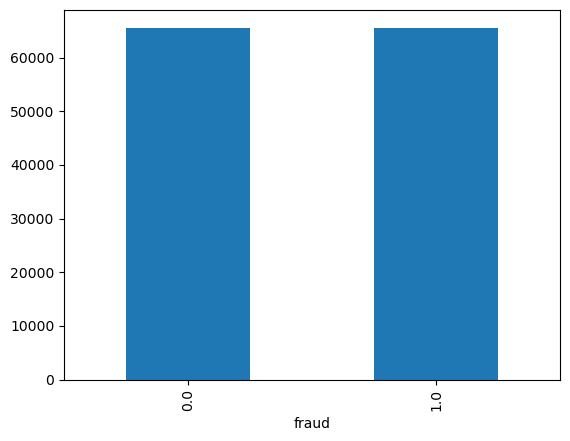

In [62]:
yes_fraud_plt = train_under['fraud'].value_counts()
yes_fraud_plt.plot(kind="bar")
plt.show()

In [64]:
X_train_under = train_under.drop(columns = ['fraud'])
y_train_under = train_under['fraud']

In [66]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [68]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228207
         1.0       0.58      0.95      0.72     21793

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [72]:
#smote
from imblearn.over_sampling import SMOTE

In [74]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [77]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [80]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [83]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228207
         1.0       0.57      0.95      0.72     21793

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [ ]:
#Logistic Regression:

    #High overall accuracy (96%) and excellent precision/recall for Class 0.
    #Struggles with detecting fraud (Class 1): Recall = 60%, indicating many missed frauds.

#Oversampling, Undersampling, and SMOTE:

    #All resampling methods improve fraud detection (Class 1 recall = 95%), reducing 
    # false negatives significantly.
    #The precision for Class 1 drops to ~58%, leading to more false positives.
    #Overall accuracy decreases slightly to 93%.

#Resampling methods (especially SMOTE or oversampling) are preferable when 
#minimizing missed frauds (false negatives) is critical.